# K-Nearest Neighbor

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import make_blobs

n_cluster = 3
n_feats = 2
n_samples = 256
n_iter = 10
seed = 31
dtype = torch.float16
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

X, y = make_blobs(n_samples=n_samples, random_state=seed)
data = torch.tensor(X, dtype=dtype, device=device)

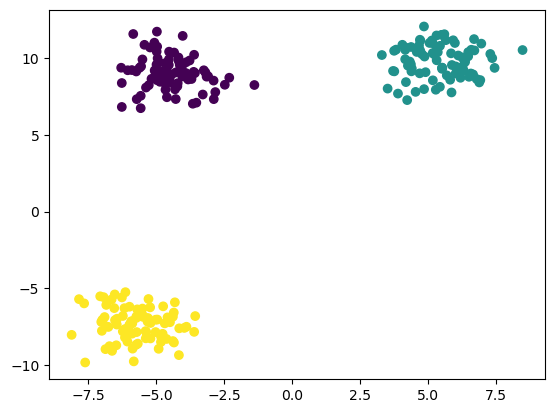

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y)

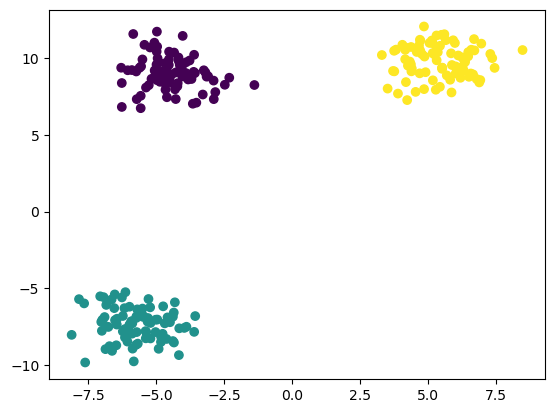

In [27]:
class KNN_L1:
    def __init__(self, n_cluster, n_feats):
        self.n_cluster = n_cluster
        self.n_feats = n_feats
        self.centroids = torch.tensor(
            np.random.rand(n_cluster, n_feats), dtype=dtype, device=device
        )

    def fit(self, X, n_iter):
        X = X.unsqueeze(1)

        for epoch in range(n_iter):
            distances = torch.sqrt(torch.sum((X - self.centroids) ** 2, dim=-1))
            cluster_assignments = torch.argmin(distances, dim=-1)
            for cluster_id in range(self.n_cluster):
                self.centroids[cluster_id, :] = X[
                    cluster_assignments == cluster_id
                ].mean(dim=0)

    def predict(self, X):
        distances = torch.sqrt(
            torch.sum((X.unsqueeze(1) - self.centroids) ** 2, dim=-1)
        )
        return torch.argmin(distances, dim=-1)


knn_l1 = KNN_L1(n_cluster=n_cluster, n_feats=n_feats)
knn_l1.fit(data, n_iter=n_iter)
y_pred = knn_l1.predict(data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.cpu())

In [31]:
class KNN_L3:
    def __init__(self, n_clusters, n_feats):
        self.n_clusters = n_clusters
        self.n_feats = n_feats
        self.centroids = torch.tensor(
            np.random.rand(n_clusters, n_feats), dtype=dtype, device=device
        )

    def fit(self, X, n_iters):
        X = X.unsqueeze(1)
        for epoch in range(n_iters):
            distances = torch.sqrt(torch.sum((X - self.centroids) ** 2, dim=-1))
            cluster_assignments = torch.argmin(distances, dim=-1)
            for cluster_id in range(self.n_clusters):
                self.centroids[cluster_id, :] = X[cluster_assignments == cluster_id].mean(
                    dim=0
                )

    def predict(self, X):
        distances = torch.sqrt(torch.sum((X.unsqueeze(1) - self.centroids), dim=-1))
        return torch.argmin(distances, dim=-1)

knn_l3 = KNN_L3(n_clusters = n_cluster, n_feats=n_feats)
knn_l3.fit(data, n_iters=n_iter)
knn_l3.predict(data)

tensor([0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2,
        2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0,
        2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0,
        0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1,
        1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2,
        1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2,
        1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
        0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0], device='mps:0')